<a href="https://colab.research.google.com/github/wsj20010128/ML_Notes/blob/main/04-Accuracy-Score/04-Accuracy-Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [9]:
X[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [10]:
some_digit = X[666]

In [11]:
y[666]

0

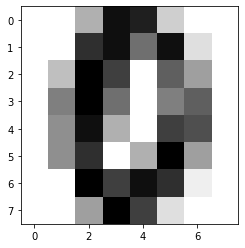

In [12]:
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [13]:
from playML.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)

In [16]:
from playML.kNN import KNNClassifier

In [17]:
my_knn_clf = KNNClassifier(k=3)

In [18]:
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [19]:
y_predict = my_knn_clf.predict(X_test)
y_predict

array([5, 4, 3, 6, 2, 3, 8, 6, 9, 4, 2, 2, 6, 1, 4, 8, 0, 5, 5, 4, 3, 9,
       5, 3, 1, 3, 9, 0, 7, 6, 5, 7, 2, 8, 4, 6, 9, 0, 4, 5, 6, 3, 1, 2,
       1, 4, 0, 1, 3, 7, 1, 8, 9, 9, 8, 2, 8, 1, 0, 7, 1, 8, 0, 7, 1, 7,
       7, 0, 5, 8, 4, 6, 7, 7, 3, 1, 6, 6, 8, 8, 4, 5, 5, 2, 6, 0, 4, 3,
       5, 7, 2, 4, 6, 8, 6, 6, 2, 7, 4, 6, 3, 4, 6, 6, 8, 6, 2, 9, 9, 5,
       7, 3, 6, 3, 5, 7, 3, 0, 9, 2, 0, 9, 8, 4, 9, 3, 9, 9, 5, 9, 5, 6,
       9, 4, 3, 2, 5, 9, 7, 5, 0, 0, 7, 1, 3, 0, 5, 5, 3, 1, 6, 0, 9, 9,
       3, 6, 3, 3, 6, 6, 1, 8, 9, 0, 1, 9, 2, 0, 3, 8, 5, 6, 9, 8, 4, 9,
       7, 8, 0, 2, 2, 1, 2, 8, 2, 7, 0, 1, 4, 4, 7, 5, 4, 5, 3, 3, 0, 5,
       5, 9, 6, 8, 1, 7, 9, 5, 0, 7, 1, 4, 9, 3, 7, 1, 2, 8, 1, 1, 3, 4,
       3, 1, 9, 0, 2, 2, 0, 5, 3, 7, 8, 0, 9, 3, 5, 2, 0, 1, 3, 1, 7, 9,
       1, 3, 2, 2, 5, 0, 5, 7, 3, 1, 4, 7, 0, 1, 6, 8, 5, 9, 5, 1, 3, 5,
       5, 8, 7, 7, 9, 7, 5, 1, 6, 6, 2, 2, 7, 4, 7, 1, 8, 8, 6, 1, 0, 3,
       7, 3, 7, 8, 9, 0, 0, 5, 0, 8, 2, 1, 9, 2, 4,

In [20]:
sum(y_predict==y_test) / len(y_test)

0.9721448467966574

In [21]:
from playML.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_predict)

0.9721448467966574

In [23]:
my_knn_clf.score(X_test, y_test)

0.9721448467966574

## accuracy_score in scikit-learn

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_predict = knn_clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9916666666666667

In [36]:
knn_clf.score(X_test, y_test)

0.9916666666666667